# Back Propagation

## 1. loading of data

In [1]:
import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]                                                   
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# 2. Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

### Task 1: Implementing backpropagation and Gradient checking


<pre>1. <b>Check this video for better understanding of the computational graphs and back propagation:</b> <a href='https://www.youtube.com/watch?v=i94OvYb6noo#t=1m33s'>https://www.youtube.com/watch?v=i94OvYb6noo</a>
</pre>

<pre>
2. <b>write two functions</b>

#you can modify the definition of this function according to your needs
<font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, ..., W[8] corresponds to w9 in graph.
        # write code to compute the value of L=(y-y')^2
        </font>
        return (L, any other variables which you might need to use for back propagation)
        <font color='grey'>
        # Hint: you can use dict type to store the required intermediate variables 
        </font>
</font>
</pre>

<pre>
# you can modify the definition of this function according to your needs
<font color='blue'>
def backward_propagation(L, Variables):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # Variables: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        </font>
        return dW
        <font color='grey'>
        # here dW can be a list, or dict or any other data type wich will have gradients of all the weights
        # Hint: you can use dict type to store the required variables 
        </font>
</font>
</pre>
3. <b> <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>Gradient checking</a></b>:<a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> 

<pre>we know that the derivative of any function is </pre>$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$
<pre>
The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of gradient checking!

</pre>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}

to do this task you need to write a function 
<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):
    <font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    </font>
    approx_gradients = []
    for each wi weight value in W:
        <font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        </font>
        approx_gradients.append(approximation gradients of weight wi)
    <font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with      gradient_check formula
    </font>
    return gradient_check
</font>
NOTE: you can do sanity check by checking all the return values of gradient_checking(), they have to be zero. if not you have bug in your code
</pre>

## Implemented graph flow & forward propagation

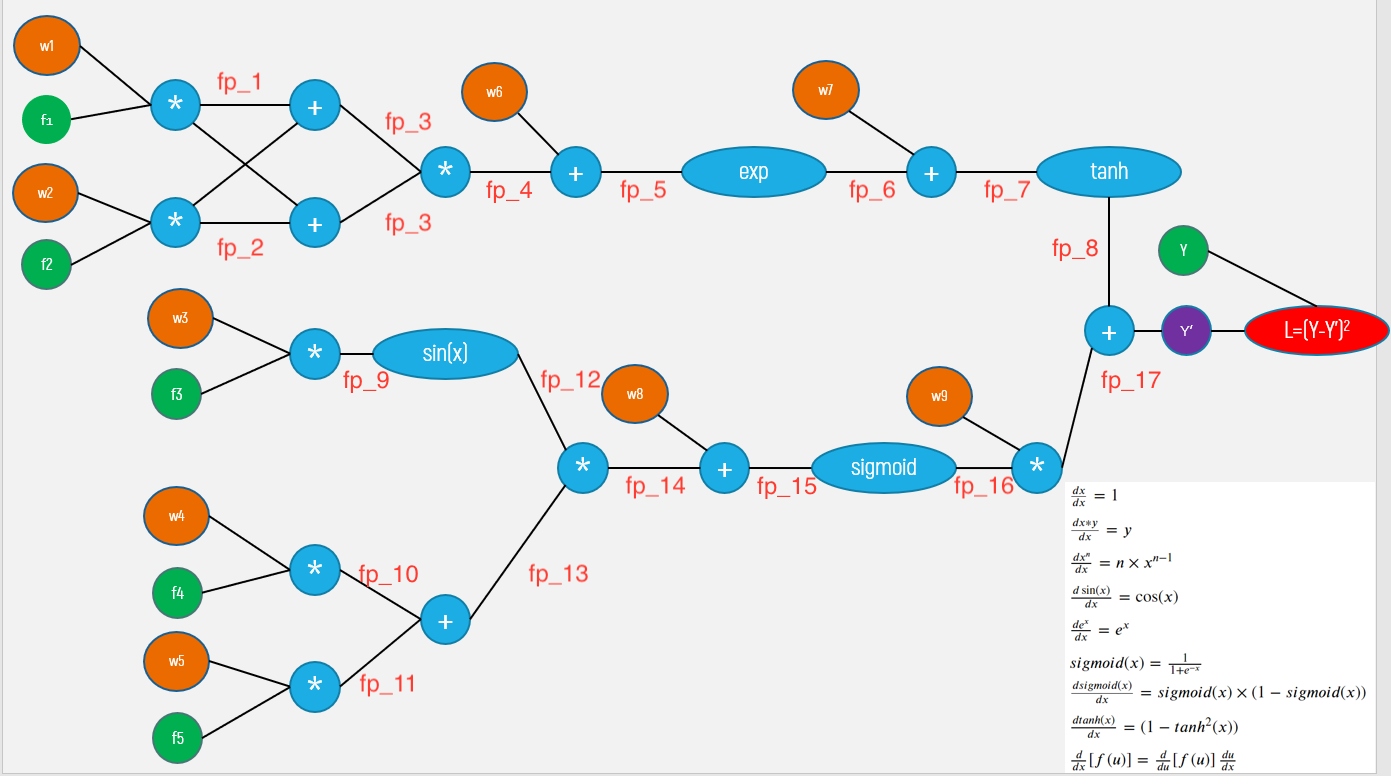



## Finding gradients

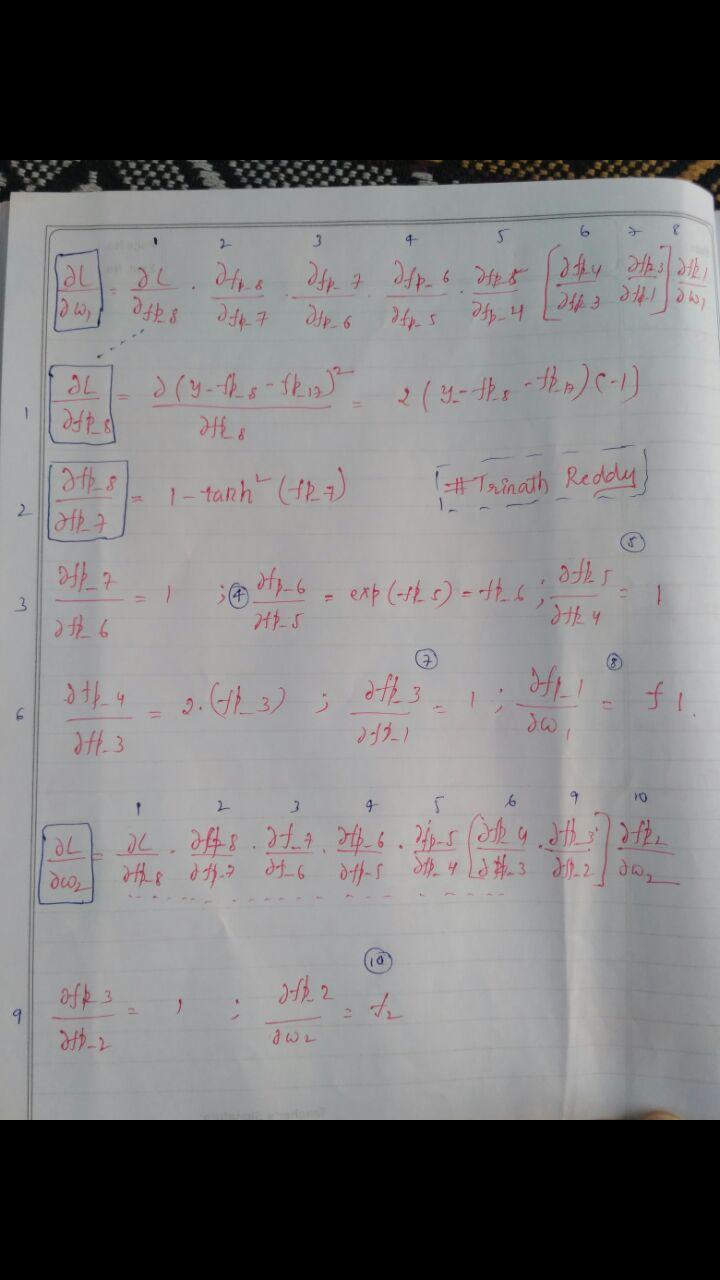

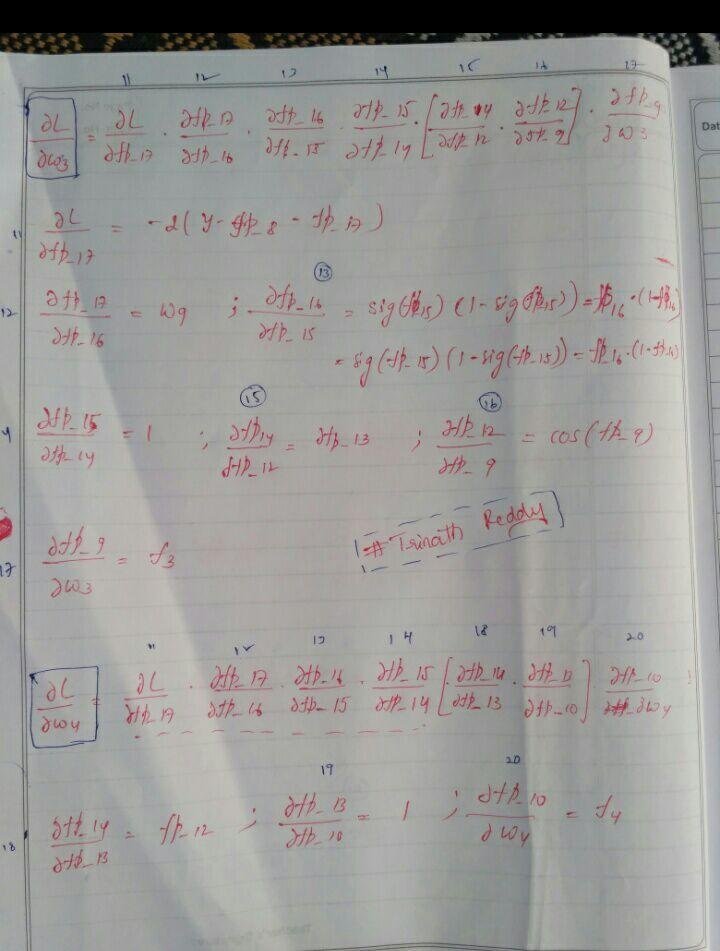

## Final function for graph

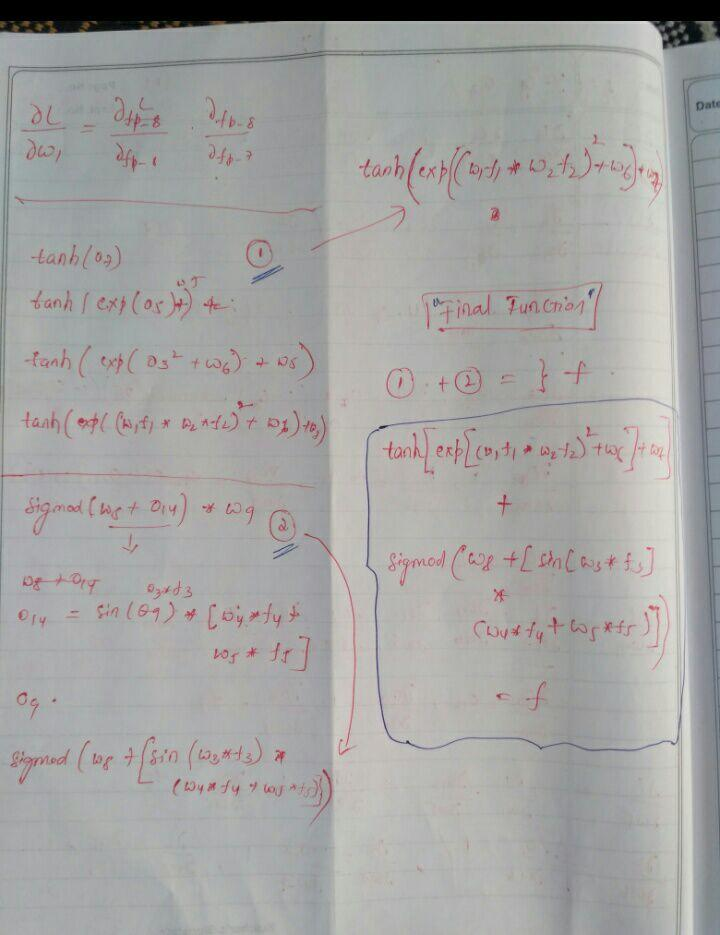

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
class BackPropagrationUsingGradientsCheck():
    def __init__(self):
        self.author = 'trinath'
        self.assignment = 'BackPropagation & Gradients Checking'

    #function for attributes intilization
    def initialization(self,X,y):
        self.X = X
        self.y = y
        self.w = np.ones(9)*0.1
        self.epsilon = 0.0001
    
    '''
        @function : compute_forward_propagation
        @params   : X - train data, y - labels, w - weights
        @logic    : for doing forward propagation for the given graph 
        @return   : loss
    ''' 
    def compute_forward_propagation(self,X, y, w):
        self.forward_propagation = {}
        #fp_1 = w1 * f1
        self.forward_propagation['fp_1'] = w[0] * X[0]

        #fp_2 = w2 * f2
        self.forward_propagation['fp_2'] = w[1] * X[1]

        self.forward_propagation['fp_3'] = self.forward_propagation['fp_1'] + self.forward_propagation['fp_2']

        self.forward_propagation['fp_4'] = self.forward_propagation['fp_3'] * self.forward_propagation['fp_3']

        #fp_5 = fp_4 + w6
        self.forward_propagation['fp_5'] = self.forward_propagation['fp_4'] + w[5]

        self.forward_propagation['fp_6'] = np.exp(self.forward_propagation['fp_5'])

        #fp_7 = fp_6 + w7
        self.forward_propagation['fp_7'] = self.forward_propagation['fp_6'] + w[6]

        self.forward_propagation['fp_8'] = np.tanh(self.forward_propagation['fp_7'])

        #fp_9 = w3 * x3
        self.forward_propagation['fp_9'] = w[2] * X[2]

        #fp_10 = w4 * f4
        self.forward_propagation['fp_10'] = w[3] * X[3]

        #fp_11 = w5 * f5
        self.forward_propagation['fp_11'] = w[4] * X[4]

        self.forward_propagation['fp_12'] = np.sin(self.forward_propagation['fp_9'])

        self.forward_propagation['fp_13'] = self.forward_propagation['fp_10'] + self.forward_propagation['fp_11']

        self.forward_propagation['fp_14'] = self.forward_propagation['fp_12'] * self.forward_propagation['fp_13']

        #fp_15 = fp_14 + w8
        self.forward_propagation['fp_15'] = self.forward_propagation['fp_14'] + w[7]

        self.forward_propagation['fp_16'] = 1/(1 + np.exp(-self.forward_propagation['fp_15']))

        #fp_17 = fp_16 * w9
        self.forward_propagation['fp_17'] = self.forward_propagation['fp_16'] * w[8]

        y_hat = self.forward_propagation['fp_8'] + self.forward_propagation['fp_17']

        L = (y-y_hat)**2
        #print(self.forward_propagation)
        return L
    
    
    '''
        @function : compute_backward_propagation
        @params   : L - loss, x - train data, y - labels, w - weights
        @logic    : for doing backward propagation for the given graph 
        @return   : updated gradients
    '''
    def compute_backward_propagation(self, L, x, y, w):
        self.d_gradients = {}
        self.update_weights = []

        '''
           For calculating ∂L/∂w1
        '''
        # ∂fp_1/∂w1 = f1
        self.d_gradients['∂fp_1/∂w1'] = x[0]

        # ∂fp_3/∂fp_1 = 1
        self.d_gradients['∂fp_3/∂fp_1'] = 1

        #∂fp_4/∂fp_3 = 2*(fp_3)
        self.d_gradients['∂fp_4/∂fp_3'] = 2 * (self.forward_propagation['fp_3'])

        #∂fp_5/∂fp_4 = 1
        self.d_gradients['∂fp_5/∂fp_4'] = 1

        #∂fp_6/∂fp_5 = exp(fp_5) = fp_6
        self.d_gradients['∂fp_6/∂fp_5'] = self.forward_propagation['fp_6']

        #∂fp_7/∂fp_6 = 1
        self.d_gradients['∂fp_7/∂fp_6'] = 1

        #∂fp_8/∂fp_7 = 1 - tanh(fp_7)^2 = 1-fp_8^2
        self.d_gradients['∂fp_8/∂fp_7'] = 1- (self.forward_propagation['fp_8']**2)

        #∂L/∂fp_8 = 2(y-fp_8-fp_17)(-1)
        self.d_gradients['∂L/∂fp_8'] = (-2)*(y-self.forward_propagation['fp_8']-self.forward_propagation['fp_17'])

        #∂L/∂w1 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w1'] = self.d_gradients['∂L/∂fp_8'] * self.d_gradients['∂fp_8/∂fp_7'] * self.d_gradients['∂fp_7/∂fp_6'] *  \
                                    self.d_gradients['∂fp_6/∂fp_5'] * self.d_gradients['∂fp_5/∂fp_4'] *self.d_gradients['∂fp_4/∂fp_3']* \
                                    self.d_gradients['∂fp_3/∂fp_1'] * self.d_gradients['∂fp_1/∂w1']


        #print("w0:",d_gradients['∂L/∂w1'])



        '''
           For calculating ∂L/∂w2
        '''

        #∂fp_3/∂fp_2 = 1
        self.d_gradients['∂fp_3/∂fp_2'] = 1

        #∂fp_2/∂w2 = fp_2
        self.d_gradients['∂fp_2/∂w2'] = x[1]

        #∂L/∂w2 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_2] * ∂fp_2/∂w2
        self.d_gradients['∂L/∂w2'] = self.d_gradients['∂L/∂fp_8'] * self.d_gradients['∂fp_8/∂fp_7'] * self.d_gradients['∂fp_7/∂fp_6'] *  \
                                    self.d_gradients['∂fp_6/∂fp_5'] * self.d_gradients['∂fp_5/∂fp_4'] *self.d_gradients['∂fp_4/∂fp_3']* \
                                    self.d_gradients['∂fp_3/∂fp_2'] * self.d_gradients['∂fp_2/∂w2']

        #print("w1:",d_gradients['∂L/∂w2'])


        '''
           For calculating ∂L/∂w3
        '''
        # ∂fp_9/∂w3= f3
        self.d_gradients['∂fp_9/∂w3'] = x[2]

        # ∂fp_12/∂fp_9 = cos(fp_9)
        self.d_gradients['∂fp_12/∂fp_9'] = np.cos(self.forward_propagation['fp_9'])

        # ∂fp_14/∂fp_12 = fp_13
        self.d_gradients['∂fp_14/∂fp_12'] = self.forward_propagation['fp_13']

        # ∂fp_15/∂fp_14 = 1
        self.d_gradients['∂fp_15/∂fp_14'] = 1

        # ∂fp_16/∂fp_15 = fp_16 * (1- fp_16)
        self.d_gradients['∂fp_16/∂fp_15'] = self.forward_propagation['fp_16'] * (1-self.forward_propagation['fp_16'])

        # ∂fp_17/∂fp_16= w9
        self.d_gradients['∂fp_17/∂fp_16'] = w[8]


        #∂L/∂fp_17 = 2(y-fp_8-fp_17)(-1)
        self.d_gradients['∂L/∂fp_17'] = (-2)*(y-self.forward_propagation['fp_8']-self.forward_propagation['fp_17'])


        #∂L/∂w3 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w3'] = self.d_gradients['∂L/∂fp_17'] * self.d_gradients['∂fp_17/∂fp_16'] * self.d_gradients['∂fp_16/∂fp_15'] *\
                                    self.d_gradients['∂fp_15/∂fp_14'] * self.d_gradients['∂fp_14/∂fp_12'] * self.d_gradients['∂fp_12/∂fp_9'] *\
                                    self.d_gradients['∂fp_9/∂w3']


        #print("w2:",d_gradients['∂L/∂w3'])


        '''
           For calculating ∂L/∂w4
        '''
        # ∂fp_10/∂w4= f4
        self.d_gradients['∂fp_10/∂w4'] = x[3]

        # ∂fp_13/∂fp_10= 1
        self.d_gradients['∂fp_13/∂fp_10'] = 1

        # ∂fp_14/∂fp_13= fp_12
        self.d_gradients['∂fp_14/∂fp_13'] = self.forward_propagation['fp_12']


        #∂L/∂w3 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w4'] = self.d_gradients['∂L/∂fp_17'] * self.d_gradients['∂fp_17/∂fp_16'] * self.d_gradients['∂fp_16/∂fp_15'] *\
                                    self.d_gradients['∂fp_15/∂fp_14'] * self.d_gradients['∂fp_14/∂fp_13'] * self.d_gradients['∂fp_13/∂fp_10'] *\
                                    self.d_gradients['∂fp_10/∂w4']

        #print("w3:",d_gradients['∂L/∂w4'])


        '''
           For calculating ∂L/∂w5
        '''
        # ∂fp_10/∂w4= f5
        self.d_gradients['∂fp_11/∂w5'] = x[4]

        #∂fp_13/∂fp_11= 1
        self.d_gradients['∂fp_13/∂fp_11'] = 1


        #∂L/∂w3 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w5'] = self.d_gradients['∂L/∂fp_17'] * self.d_gradients['∂fp_17/∂fp_16'] * self.d_gradients['∂fp_16/∂fp_15'] *\
                                    self.d_gradients['∂fp_15/∂fp_14'] * self.d_gradients['∂fp_14/∂fp_13'] * self.d_gradients['∂fp_13/∂fp_11'] *\
                                    self.d_gradients['∂fp_11/∂w5']

        #print("w4:",d_gradients['∂L/∂w5'])



        '''
           For calculating ∂L/∂w6
        '''
        # ∂fp_6/∂fp_5 =  1
        self.d_gradients['∂fp_5/∂w6'] = 1

        #∂L/∂w3 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w6'] = self.d_gradients['∂L/∂fp_8'] * self.d_gradients['∂fp_8/∂fp_7'] * self.d_gradients['∂fp_7/∂fp_6'] *  \
                                    self.d_gradients['∂fp_6/∂fp_5'] 

        #print("w5:",d_gradients['∂L/∂w6'])


        '''
           For calculating ∂L/∂w7
        '''
         # ∂fp_6/∂fp_5 =  1
        self.d_gradients['∂fp_7/∂w7'] = 1

        #∂L/∂w3 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w7'] = self.d_gradients['∂L/∂fp_8'] * self.d_gradients['∂fp_8/∂fp_7'] * self.d_gradients['∂fp_7/∂fp_6']

        #print("w6:",d_gradients['∂L/∂w7'])



        '''
           For calculating ∂L/∂w8
        '''
         # ∂fp_6/∂fp_5 =  1
        self.d_gradients['∂fp_15/∂w8'] = 1

        #∂L/∂w3 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w8'] = self.d_gradients['∂L/∂fp_17'] * self.d_gradients['∂fp_17/∂fp_16'] * self.d_gradients['∂fp_16/∂fp_15'] *\
                                    self.d_gradients['∂fp_15/∂w8']

        #print("w7:",d_gradients['∂L/∂w8'])


        '''
           For calculating ∂L/∂w9
        '''
         # ∂fp_17/∂w9 =  1
        self.d_gradients['∂fp_17/∂w9'] = self.forward_propagation['fp_16']

        #∂L/∂w3 = ∂L/∂fp_8 * ∂fp_8/∂fp_7 * ∂fp_7/∂fp_6 * ∂fp_6/∂fp_5 * ∂fp_5/∂fp_4 * [∂fp_4/∂fp_3 * ∂fp_3/∂fp_1] * ∂fp_1/∂w1
        self.d_gradients['∂L/∂w9'] = self.d_gradients['∂L/∂fp_17'] *  self.d_gradients['∂fp_17/∂w9'] 

        #print("w8:",d_gradients['∂L/∂w9'])


        update_gradients = [self.d_gradients['∂L/∂w1'], self.d_gradients['∂L/∂w2'], self.d_gradients['∂L/∂w3'], self.d_gradients['∂L/∂w4'], self.d_gradients['∂L/∂w5'],
                            self.d_gradients['∂L/∂w6'], self.d_gradients['∂L/∂w7'], self.d_gradients['∂L/∂w8'], self.d_gradients['∂L/∂w9']]
        return update_gradients
    
    #for finding the appox gradients
    def approximation_gradients(self,plus_loss, minus_loss, epsilon):
        return (plus_loss-minus_loss)/(2*epsilon)
        
    #for checking the gradeitns
    def compute_gradients_checking(self,data_point, weights, epsilon):
        approx_gradients = []
        get_weights = weights
        for indx, each_weight in enumerate(get_weights):
            # adding small value to weight with epsilon 
            get_weights[indx]   = get_weights[indx]  + epsilon
            epsilon_plus_L = self.compute_forward_propagation(X[0], y[0], get_weights)
            #print(epsilon_plus_L)
            get_weights[indx]   = get_weights[indx]  - epsilon

            # subtracting small value to weight wi
            get_weights[indx]   = get_weights[indx]  - epsilon
            epsilon_minus_L = self.compute_forward_propagation(X[0], y[0], get_weights)
            #print(epsilon_minus_L)
            approx_grad = self.approximation_gradients(epsilon_plus_L, epsilon_minus_L, epsilon)
            approx_gradients.append(approx_grad)

            get_weights[indx]   = get_weights[indx]  + epsilon
            #print("\noriginal",get_weights)
        return approx_gradients
    
    #function to check the gradients are correct
    def gradient_check(self,original_grads, approx_grads):
        for org, approx in zip(original_grads, approx_grads):
            val = np.linalg.norm(org - approx)/ (np.linalg.norm(org) + np.linalg.norm(approx))
            if val < 1e-7:
                print("correct")
            else:
                print("Wrong")
            print(org, approx,val)
    
    


        

In [4]:
#get te object of model
model = BackPropagrationUsingGradientsCheck()

In [5]:
#model initlization
model.initialization(X,y)

In [6]:
#finding model loss
loss = model.compute_forward_propagation(model.X[0], model.y[0], model.w)

In [7]:
#computing the gradeints using forward propagation
original_grads = model.compute_backward_propagation(loss, model.X[0], model.y[0], model.w)

In [8]:
#checking the values
loss, original_grads

(0.9298048963072919,
 [-0.22973323498702,
  -0.02140761471775293,
  -0.005625405580266319,
  -0.004657941222712423,
  -0.0010077228498574246,
  -0.6334751873437471,
  -0.561941842854033,
  -0.04806288407316516,
  -1.0181044360187037])

In [9]:
#checking the gradients using compute_gradients_checking
approx_grads = model.compute_gradients_checking(model.X[0], model.w, model.epsilon) 

In [10]:
approx_grads

[-0.22973323022201786,
 -0.021407614714252787,
 -0.0056254055608162545,
 -0.004657941222729889,
 -0.0010077228507210378,
 -0.6334751863784627,
 -0.5619418463920223,
 -0.0480628840343611,
 -1.0181044360180191]

In [11]:
#cross checking if the gradints are correct
model.gradient_check(original_grads, approx_grads)


correct
-0.22973323498702 -0.22973323022201786 1.0370728885929153e-08
correct
-0.02140761471775293 -0.021407614714252787 8.17499099168924e-11
correct
-0.005625405580266319 -0.0056254055608162545 1.7287700041112022e-09
correct
-0.004657941222712423 -0.004657941222729889 1.87486944153289e-12
correct
-0.0010077228498574246 -0.0010077228507210378 4.2849738752544037e-10
correct
-0.6334751873437471 -0.6334751863784627 7.618959889684771e-10
correct
-0.561941842854033 -0.5619418463920223 3.1480030084674753e-09
correct
-0.04806288407316516 -0.0480628840343611 4.0368014625577295e-10
correct
-1.0181044360187037 -1.0181044360180191 3.361951351774315e-13


### Task 2: Optimizers

1. As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
2. check this video and blog: https://www.youtube.com/watch?v=gYpoJMlgyXA,  http://cs231n.github.io/neural-networks-3/
3. use the same computational graph that was mentioned above to do this task
4. initilze the 9 weights from normal distribution with mean=0 and std=0.01

5. 

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

6.

<pre>
<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights
<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights
<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights
</pre>



In [12]:
class Optimizer():
    def __init__(self):
        self.task = 'optimizing the gradients'
        self.author = 'Trinath Reddy'
        self.total_epocs = 100
        self.learning_rate = 0.01
    
    #fuction for epocs vs plotting loss 
    def draw_loss_plot(self, epoch_loss, loss_type):
        plt.plot(epoch_loss)
        plt.title(loss_type)
        plt.xlabel('no of epocs')
        plt.ylabel('loss')
        plt.show()
        
    #function for doing vanilla optimization
    def vanilla_optimization(self,X,y):
        epoch_loss = []
        N = len(X)
        total_epocs = 100
        each_epoch_weights = np.random.normal(0, 0.01, 9)
        learning_rate = 0.01 
        for each_epoch in range(self.total_epocs):
            each_epoch_x, each_epoch_y = X, y 
            curr_loss = 0
            for each_point in range(each_epoch_x.shape[0]):
                each_Loss = model.compute_forward_propagation(each_epoch_x[each_point], each_epoch_y[each_point], each_epoch_weights)
                backprop_grads = model.compute_backward_propagation(each_Loss,each_epoch_x[each_point], each_epoch_y[each_point], each_epoch_weights)
                each_epoch_weights += -(self.learning_rate*np.array(backprop_grads))
                curr_loss += each_Loss
            epoch_loss.append(curr_loss/N)
        return epoch_loss
    
    #function for finding momentum optimization
    def momentum_optimization(self,X,y):
        epoch_loss = []
        N = len(X)
        each_epoch_weights = np.random.normal(0, 0.01, 9)
        for each_epoch in range(self.total_epocs):
            each_epoch_x, each_epoch_y = X, y 
            curr_loss = 0
            v = 0
            mu = 0.95
            for each_point in range(each_epoch_x.shape[0]):
                each_Loss = model.compute_forward_propagation(each_epoch_x[each_point], each_epoch_y[each_point], each_epoch_weights)
                backprop_grads = model.compute_backward_propagation(each_Loss,each_epoch_x[each_point], each_epoch_y[each_point], each_epoch_weights)
                v = mu * v -(self.learning_rate*np.array(backprop_grads)) 
                each_epoch_weights += v
                curr_loss += each_Loss
            epoch_loss.append(curr_loss/N)
        return epoch_loss
    
    #funciton for doing adam optimization
    def adam_optimization(self,X,y):
        epoch_loss = []
        N = len(X)
        total_epocs = 100
        each_epoch_weights = np.random.normal(0, 0.01, 9)
        eps = 1e-6
        beta1 = 0.9
        beta2 = 0.999
        m = v = 0
        for each_epoch in range(self.total_epocs):
            curr_loss = 0
            each_epoch_x, each_epoch_y = X, y 
            for each_point in range(each_epoch_x.shape[0]):
                each_Loss = model.compute_forward_propagation(each_epoch_x[each_point], each_epoch_y[each_point], each_epoch_weights)
                backprop_grads = model.compute_backward_propagation(each_Loss,each_epoch_x[each_point], each_epoch_y[each_point], each_epoch_weights)
                m = beta1*m + (1-beta1)*np.array(backprop_grads)
                v = beta2*v + (1-beta2)*(np.array(backprop_grads)**2)
                each_epoch_weights += - self.learning_rate * m / (np.sqrt(v) + eps)
                curr_loss += each_Loss
            epoch_loss.append(curr_loss/N)
        return epoch_loss
        

In [13]:
opt = Optimizer()

task 2.1: you will be implementing the above algorithm with Vanilla update of weights

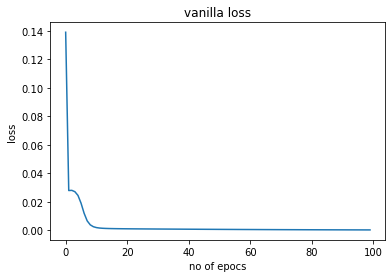

In [14]:
get_vanila_loss = opt.vanilla_optimization(X,y)
opt.draw_loss_plot(get_vanila_loss, 'vanilla loss')

task 2.2: you will be implementing the above algorithm with Momentum update of weights

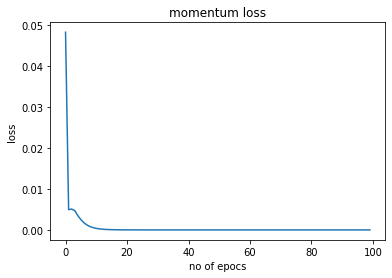

In [15]:
get_momentum_loss = opt.momentum_optimization(X,y)
opt.draw_loss_plot(get_momentum_loss, 'momentum loss')

task 2.3: you will be implementing the above algorithm with Adam update of weights

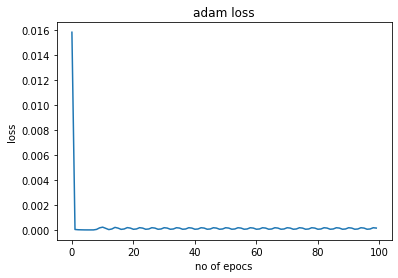

In [16]:
get_adam_loss = opt.adam_optimization(X,y)
opt.draw_loss_plot(get_adam_loss, 'adam loss')